# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [3]:
path='dogs-vs-cats/train/'

In [4]:
# train set 만들기

In [37]:
## used for resize and in our model
ROW, COL = 96, 96  # 사이즈 통일 시키기

dogs, cats = [], []
y_dogs, y_cats = [], []

In [38]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path)) # 파일 이름이 5로 시작하는 애가 몇 개인지 알려줌

1111

In [39]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)# 이미지를 읽음
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY) # 그레이색으로 바꿈
    dog = cv2.resize(dog, (ROW, COL)) # 설정해놓은 사이즈로 바꿈
    dog = image.img_to_array(dog) # 어레이로 만듬
    dogs.append(dog) # 이렇게 바꾼 사진들이 dogs에 들어감

In [40]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)  # 고양이고 위에랑 이하 동일

In [41]:
classes = ['dog', 'cat'] # 클래스 설정

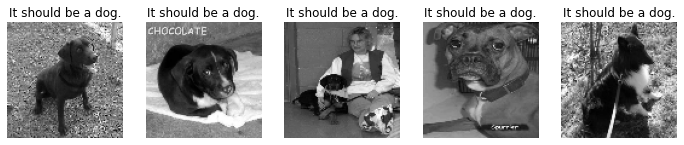

In [42]:
plt.figure(figsize=(12,8))  # 클래스에 제대로 들어갔는지 확인
for i in range(5):  # 강아지 사진을 랜덤으로 5개 보여주는 조건문
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

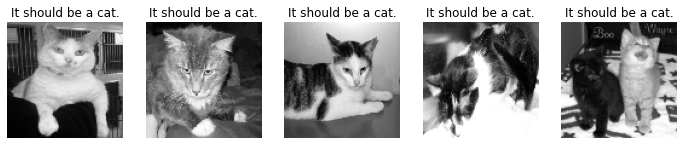

In [43]:
plt.figure(figsize=(12,8))  # 클래스에 제대로 들어갔는지 확인
for i in range(5):  # 고양이 사진을 랜덤으로 5개 보여주는 조건문
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [44]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]  # 강아지 고양이의 값을
y_cats = [0 for item in enumerate(cats)]  # 1 또는 0으로 줌

In [45]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [46]:
dog.shape

(96, 96, 1)

In [47]:
x_train = np.concatenate((dogs, cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [48]:
len(x_train)

2222

In [17]:
## One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 2) #위에 트레인으로 바꾸면 할 필요없음

In [18]:
# Test set (dog.12*, cats.12*)
dogs, cats = [], []
y_dog, y_cat = [], []

In [19]:
dog_path = os.path.join(path, 'dog.12*')
len(glob(dog_path))

611

In [20]:
cat_path = os.path.join(path, 'cat.12*')
len(glob(cat_path))

611

In [21]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [22]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [23]:
## just change the labels for 0 and  1
y_dog = [1 for item in enumerate(dogs)]  # 강아지 고양이의 값을
y_cat = [0 for item in enumerate(cats)]  # 1 또는 0으로 줌

In [24]:
x_test = np.concatenate((dogs, cats), axis=0)
y_test = np.concatenate((y_dog, y_cat), axis=0)

In [25]:
len(x_test)

1222

In [26]:
len(y_test)

1222

In [51]:
## One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 2)

In [28]:
## One-Hot Encoding
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [29]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)       

In [58]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])  # 'adam'을 import 해서 클레스로 씀

In [59]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### 모델 학습

In [60]:
x_train.shape

(2222, 96, 96, 1)

In [61]:
y_train.shape

(2222, 2)

In [62]:
x_test.shape

(1222, 96, 96, 1)

In [63]:
y_test.shape

(1222, 2)

In [64]:
model.fit(x_train, y_train, batch_size=32, epochs=40, validation_split=0.2,
          callbacks=[checkpointer])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1777/1777 [==============================] - 31s 18ms/step - loss: 0.0196 - accuracy: 0.9949 - val_loss: 5.2523 - val_accuracy: 0.5079

Epoch 00001: val_loss improved from inf to 5.25226, saving model to model/dogs_vs_cats-cnn-01-5.2523.hdf5
Epoch 2/40
1777/1777 [==============================] - 31s 17ms/step - loss: 0.0132 - accuracy: 0.9949 - val_loss: 4.7861 - val_accuracy: 0.5393

Epoch 00002: val_loss improved from 5.25226 to 4.78613, saving model to model/dogs_vs_cats-cnn-02-4.7861.hdf5
Epoch 3/40
1777/1777 [==============================] - 31s 17ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 4.2313 - val_accuracy: 0.5865

Epoch 00003: val_loss improved from 4.78613 to 4.23131, saving model to model/dogs_vs_cats-cnn-03-4.2313.hdf5
Epoch 4/40
1777/1777 [==============================] - 31s 17ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 5.3343 - val_accuracy: 0.5528

Epoch 00004: val_loss did not improve f

In [65]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn-22-2.6700.hdf5')

In [66]:
x_test.shape

(1222, 96, 96, 1)

In [67]:
y_test.shape

(1222, 2)

In [68]:
scores = model.evaluate(x_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

1222/1222 - 3s - loss: 662.9398 - accuracy: 0.6391
MODEL ACCURACY: 0.63912
